<a href="https://colab.research.google.com/github/ayuskac13/Projects_Data-Analysis/blob/main/burnout_issues_among_employees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)
burnoutDf=pd.read_csv('/content/drive/MyDrive/employee_burnout_analysis-AI.csv')
burnoutDf

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,12/30/2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,1/19/2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,11/5/2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,2,5.0,5.9,0.52


In [ ]:
burnoutDf["Date of Joining"]=pd.to_datetime(burnoutDf["Date of Joining"])

In [ ]:
burnoutDf.shape

(22750, 9)

In [ ]:
burnoutDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
burnoutDf.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
burnoutDf.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
burnoutDf.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
burnoutDf.duplicated().sum()

0

In [ ]:
burnoutDf.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [ ]:
for i ,col in enumerate(burnoutDf.columns):
  print(f"\n\n{burnoutDf[col].unique()}")
  print(f"\n{burnoutDf[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

Employee ID
fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: count, Length: 22750, dtype: int64




<DatetimeArray>
['2008-09-30 00:00:00', '2008-11-30 00:00:00', '2008-03-10 00:00:00',
 '2008-11-03 00:00:00', '2008-07-24 00:00:00', '2008-11-26 00:00:00',
 '2008-01-02 00:00:00', '2008-10-31 00:00:00', '2008-12-27 00:00:00',
 '2008-03-09 00:00:00',
 ...
 '2008-05-24 00:00:00', '2008-06-10 00:00:00', '2008-03-31 00:00:00',
 '2008-12-01 00:00:00', '2008-01-05 00:00:00', '2008-09-15 00:00:00',
 '2008-12-10 00:00:00', '2008-02-10 00:00:00', '2008-12-03 00

In [ ]:
burnoutDf = burnoutDf.drop(['Employee ID'],axis=1)

In [ ]:
!pip install --upgrade numpy

In [ ]:
intFloatburnoutDf = burnoutDf.select_dtypes([np.int64, np.float64])
for i, col in enumerate(intFloatburnoutDf.columns):
  if (intFloatburnoutDf[col].skew() >= 0.1):
    print("\n",col, "feature is Positively Skewed and value is: ", intFloatburnoutDf[col].skew())
  elif (intFloatburnoutDf[col].skew() <= -0.1):
    print("\n",col, "feature is Negtively Skewed and value is: ", intFloatburnoutDf[col].skew())
  else:
    print("\n",col, "feature is Normally Distributed and value is: ", intFloatburnoutDf[col].skew())


 Designation feature is Normally Distributed and value is:  0.09242138478903683

 Resource Allocation feature is Positively Skewed and value is:  0.20457273454318103

 Mental Fatigue Score feature is Negtively Skewed and value is:  -0.4308950578815428

 Burn Rate feature is Normally Distributed and value is:  0.045737370909640515


In [ ]:
burnoutDf['Resource Allocation'].fillna(burnoutDf['Resource Allocation'].mean(),inplace=True)
burnoutDf['Mental Fatigue Score'].fillna(burnoutDf['Mental Fatigue Score'].mean(),inplace=True)
burnoutDf['Burn Rate'].fillna(burnoutDf['Burn Rate'].mean(),inplace=True)

In [ ]:
burnoutDf.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
burnoutDf.dtypes

Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [ ]:
columns_to_drop = ['Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available']
numeric_burnoutDf = burnoutDf.drop(columns=columns_to_drop)

# Calculate the correlation matrix for the remaining columns
correlation_matrix = numeric_burnoutDf.corr()

print(correlation_matrix)

                      Designation  Resource Allocation  Mental Fatigue Score  \
Designation              1.000000             0.852046              0.656445   
Resource Allocation      0.852046             1.000000              0.739268   
Mental Fatigue Score     0.656445             0.739268              1.000000   
Burn Rate                0.719284             0.811062              0.878217   

                      Burn Rate  
Designation            0.719284  
Resource Allocation    0.811062  
Mental Fatigue Score   0.878217  
Burn Rate              1.000000  


In [ ]:
correlation_matrix = numeric_burnoutDf.corr()

# Set the figure size for seaborn
sns.set(rc={'figure.figsize': (14, 12)})

# Use plotly to create the heatmap
fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto")
fig.show()

In [ ]:
burnoutDf.dtypes

Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [ ]:
burnoutDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date of Joining       22750 non-null  datetime64[ns]
 1   Gender                22750 non-null  object        
 2   Company Type          22750 non-null  object        
 3   WFH Setup Available   22750 non-null  object        
 4   Designation           22750 non-null  int64         
 5   Resource Allocation   22750 non-null  float64       
 6   Mental Fatigue Score  22750 non-null  float64       
 7   Burn Rate             22750 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.4+ MB


In [ ]:
burnoutDf=pd.read_csv('/content/drive/MyDrive/employee_burnout_analysis-AI.csv')

In [ ]:
burnoutDf = burnoutDf.drop(['Employee ID'],axis=1)

In [ ]:
burnoutDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       22750 non-null  object 
 1   Gender                22750 non-null  object 
 2   Company Type          22750 non-null  object 
 3   WFH Setup Available   22750 non-null  object 
 4   Designation           22750 non-null  int64  
 5   Resource Allocation   21369 non-null  float64
 6   Mental Fatigue Score  20633 non-null  float64
 7   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.4+ MB


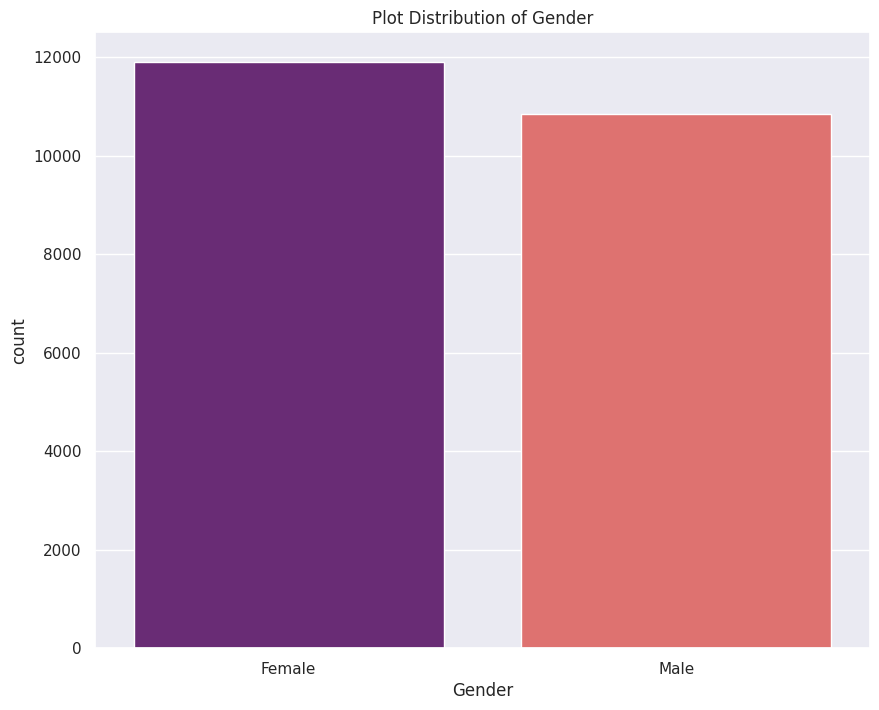

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender", data = burnoutDf, palette="magma")
plt.title("Plot Distribution of Gender")
plt.show()

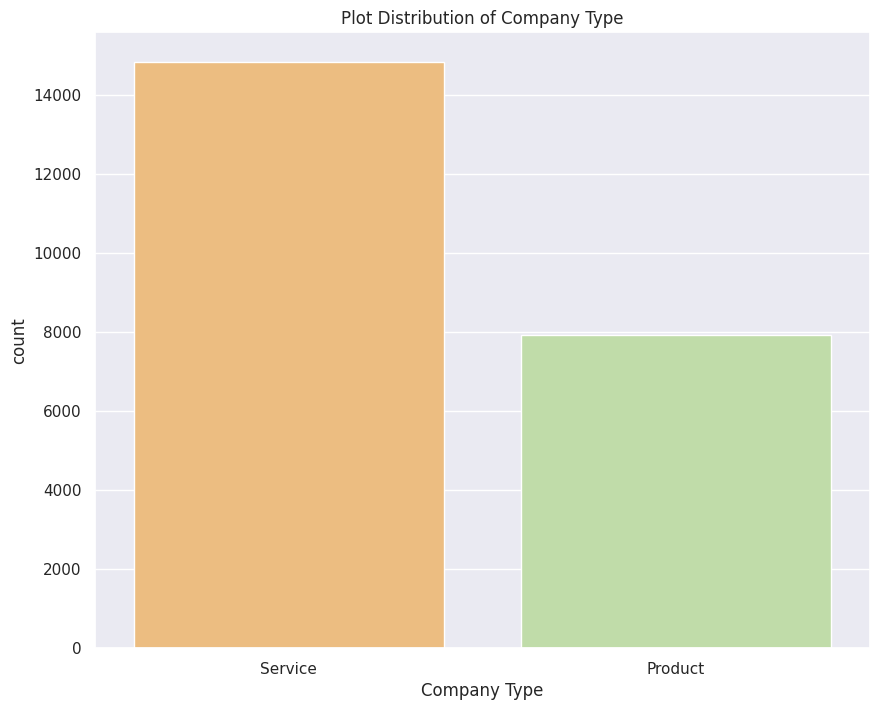

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type", data = burnoutDf, palette="Spectral")
plt.title("Plot Distribution of Company Type")
plt.show()

In [ ]:
burn_st=burnoutDf.loc[:, 'Date of Joining':'Burn Rate']
burn_st=burn_st.select_dtypes ([int, float])
for i, col in enumerate(burn_st.columns):
  fig = px.histogram(burn_st, x=col, title="Plot Distribution of "+col, color_discrete_sequence=["indianred"])
  fig.update_layout(bargap=0.2)
  fig.show()

In [ ]:
fig = px.line(burnoutDf, y="Burn Rate", color="Designation", title="Burn rate on the basis of Designation", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

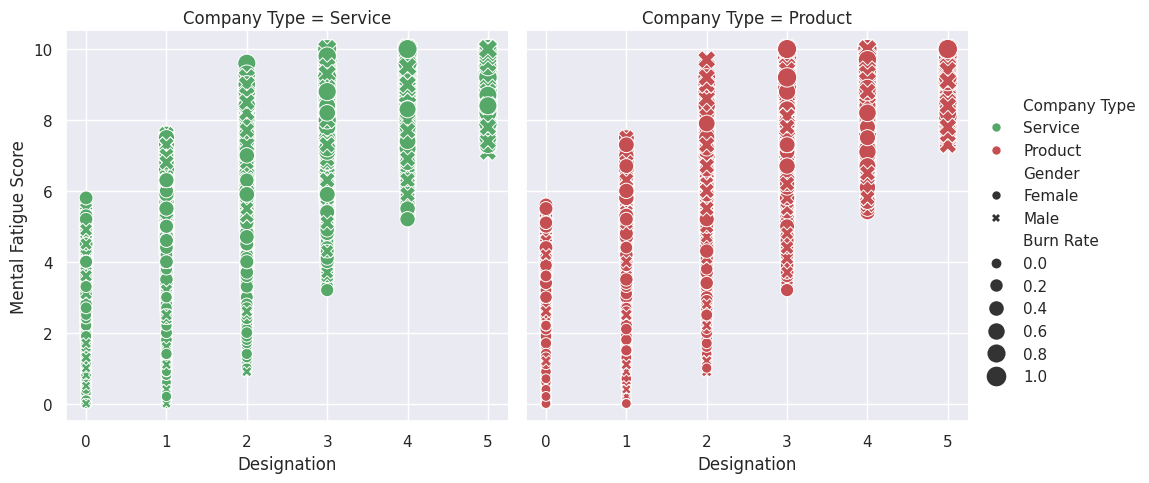

In [ ]:
sns.relplot(
    data=burnoutDf, x="Designation", y="Mental Fatigue Score", col="Company Type",
    hue="Company Type", size="Burn Rate", style="Gender",
    palette=["g", "r"], sizes=(50,200)
)

In [ ]:
from sklearn import preprocessing
Label_encode = preprocessing.LabelEncoder()
burnoutDf['GenderLabel'] = Label_encode.fit_transform(burnoutDf['Gender'].values)
burnoutDf['Company_TypeLabel'] = Label_encode.fit_transform(burnoutDf['Company Type'].values)
burnoutDf['WFH_Setup_AvailableLabel'] = Label_encode.fit_transform(burnoutDf['WFH Setup Available'].values)

In [ ]:
gn = burnoutDf.groupby('Gender')
gn = gn['GenderLabel']
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [ ]:
ct = burnoutDf.groupby('Company Type')
ct = ct['Company_TypeLabel']
ct.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [ ]:
burnoutDf['Mental Fatigue Score'].fillna(method='ffill', inplace=True)
burnoutDf['Burn Rate'].fillna(method='ffill', inplace=True)
burnoutDf['Resource Allocation'].fillna(method='ffill', inplace=True)

In [ ]:
burnoutDf.tail(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH_Setup_AvailableLabel
22740,9/5/2008,Female,Product,No,3,6.0,7.3,0.55,0,0,0
22741,1/7/2008,Male,Product,No,2,5.0,6.0,0.55,1,0,0
22742,7/28/2008,Male,Product,No,3,5.0,8.1,0.69,1,0,0
22743,12/15/2008,Female,Product,Yes,1,3.0,6.0,0.48,0,0,1
22744,5/27/2008,Male,Product,No,3,7.0,6.2,0.54,1,0,0
22745,12/30/2008,Female,Service,No,1,3.0,6.2,0.41,0,1,0
22746,1/19/2008,Female,Product,Yes,3,6.0,6.7,0.59,0,0,1
22747,11/5/2008,Male,Service,Yes,3,7.0,6.7,0.72,1,1,1
22748,1/10/2008,Female,Service,No,2,5.0,5.9,0.52,0,1,0
22749,1/6/2008,Male,Product,No,3,6.0,7.8,0.61,1,0,0


In [ ]:
Columns=['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'GenderLabel', 'Company_TypeLabel', 'WFH_Setup_AvailableLabel']
X=burnoutDf[Columns]
y=burnoutDf['Burn Rate']

In [ ]:
print(X)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2                  3.0                   3.8            0   
1                1                  2.0                   5.0            1   
2                2                  2.0                   5.8            0   
3                1                  1.0                   2.6            1   
4                3                  7.0                   6.9            0   
...            ...                  ...                   ...          ...   
22745            1                  3.0                   6.2            0   
22746            3                  6.0                   6.7            0   
22747            3                  7.0                   6.7            1   
22748            2                  5.0                   5.9            0   
22749            3                  6.0                   7.8            1   

       Company_TypeLabel  WFH_Setup_AvailableLabel  
0         

In [ ]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
print("PCA shape of x is: ",X_pca.shape, "and orignal shape is: ", X.shape)
print("% of importance of selected features is:", pca.explained_variance_ratio_)
print("The number of features selected through PCA is:", pca.n_components_)

PCA shape of x is:  (22750, 4) and orignal shape is:  (22750, 6)
% of importance of selected features is: [0.76437214 0.13100527 0.03381133 0.02507371]
The number of features selected through PCA is: 4


data splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test, Y_train, Y_test = train_test_split(X_pca,y, test_size = 0.25, random_state=10)
#print the shape of splitted data
print(X_train_pca.shape, X_test.shape, Y_train.shape, Y_test.shape)

(17062, 4) (5688, 4) (17062,) (5688,)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_pca, Y_train)
train_pred_rf = rf_model.predict(X_train_pca)
train_r2 = r2_score(Y_train, train_pred_rf)
test_pred_rf = rf_model.predict(X_test)
test_r2 = r2_score(Y_test, test_pred_rf)
#Accuracy score
print("Accuracy score of train data: "+str(round (100*train_r2, 4))+" %")
print("Accuracy score of test data: "+str(round (100*test_r2, 4))+" %")

Accuracy score of train data: 88.6675 %
Accuracy score of test data: 74.1559 %


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abr_model = AdaBoostRegressor()
abr_model.fit(X_train_pca, Y_train)
train_pred_adboost = abr_model.predict(X_train_pca)
train_r2 = r2_score(Y_train, train_pred_adboost)
test_pred_adaboost = abr_model.predict(X_test)
test_r2 = r2_score(Y_test, test_pred_adaboost)
# Accuracy score
print("Accuracy score of train data: "+str(round (100*train_r2, 4))+" %")
print("Accuracy score of test data: "+str(round (100*test_r2, 4))+" %")

Accuracy score of train data: 64.0778 %
Accuracy score of test data: 63.1449 %
